In [220]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency, mannwhitneyu, kruskal
import warnings
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [221]:
df = pd.read_csv('Data/raw/tech_salaries.csv')

print("Primeras 5 filas del DataFrame:")
print(df.head())

Primeras 5 filas del DataFrame:
   Unnamed: 0  work_year experience_level employment_type           job_title  \
0           0       2025               MI              FT  Penetration Tester   
1           1       2025               MI              CT   Security Engineer   
2           2       2025               MI              CT   Security Engineer   
3           3       2025               MI              FT   Security Engineer   
4           4       2025               MI              FT   Security Engineer   

    salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0  1336608             INR          15804                 IN             0   
1   130000             USD         130000                 US             0   
2   120000             USD         120000                 US             0   
3   120000             USD         120000                 US             0   
4    80000             USD          80000                 US             0   

  company_lo

In [222]:
print("Valores √∫nicos en 'experience_level':")
print(df['experience_level'].unique())

print("\nValores √∫nicos en 'employment_type':")
print(df['employment_type'].unique())

print("\nValores √∫nicos en 'company_size':")
print(df['company_size'].unique())

Valores √∫nicos en 'experience_level':
['MI' 'SE' 'EN' 'EX']

Valores √∫nicos en 'employment_type':
['FT' 'CT' 'PT' 'FL']

Valores √∫nicos en 'company_size':
['L' 'M' 'S']


## Abbreviations Meaning Guide
These are the standard abbreviations:

### Experience Level (`experience_level`)
* **EN**: Entry-level / Junior
* **MI**: Mid-level / Intermediate  
* **SE**: Senior-level / Expert
* **EX**: Executive-level / Director

### Employment Type (`employment_type`)
* **FT**: Full-time
* **PT**: Part-time
* **CT**: Contract
* **FL**: Freelance

In [223]:
print("\nInformaci√≥n general del DataFrame:")
df.info()



Informaci√≥n general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65117 entries, 0 to 65116
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          65117 non-null  int64 
 1   work_year           65117 non-null  int64 
 2   experience_level    65117 non-null  object
 3   employment_type     65117 non-null  object
 4   job_title           65117 non-null  object
 5   salary              65117 non-null  int64 
 6   salary_currency     65117 non-null  object
 7   salary_in_usd       65117 non-null  int64 
 8   employee_residence  65117 non-null  object
 9   remote_ratio        65117 non-null  int64 
 10  company_location    65117 non-null  object
 11  company_size        65117 non-null  object
dtypes: int64(5), object(7)
memory usage: 6.0+ MB


In [224]:
missing_values = df.isnull().sum()

print(missing_values)

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


In [225]:
print("\nEstad√≠sticas descriptivas de las columnas num√©ricas:")
print(df.describe())


Estad√≠sticas descriptivas de las columnas num√©ricas:
         Unnamed: 0     work_year        salary  salary_in_usd  remote_ratio
count  65117.000000  65117.000000  6.511700e+04   65117.000000  65117.000000
mean   32010.679331   2024.395903  1.677303e+05  145093.128354     20.254311
std    18789.833314      0.819922  3.071000e+06   62600.555119     39.949287
min        0.000000   2020.000000  4.000000e+03    2859.000000      0.000000
25%    15727.000000   2024.000000  1.000000e+05  100000.000000      0.000000
50%    32006.000000   2025.000000  1.369000e+05  136218.000000      0.000000
75%    48285.000000   2025.000000  1.802000e+05  180000.000000      0.000000
max    64564.000000   2025.000000  6.000000e+08  750000.000000    100.000000


* Data: You have 65,117 records in total.

* Relevance: The data is very current, mainly from 2024-2025.

* Key Salary: The salary_in_usd column is the one you should use for analysis. The median salary is $136k USD.

* Work Modality: The vast majority of offers are for 100% on-site work.

In [226]:
num_duplicates = df.duplicated().sum()

print(f"N√∫mero de filas duplicadas: {num_duplicates}")

N√∫mero de filas duplicadas: 0


### Experience Level Analysis

--- Distribuci√≥n por Nivel de Experiencia ---
Conteo:
experience_level
SE    36310
MI    20376
EN     6701
EX     1730
Name: count, dtype: int64

Porcentaje (%):
experience_level
SE    55.761168
MI    31.291368
EN    10.290707
EX     2.656756
Name: proportion, dtype: float64


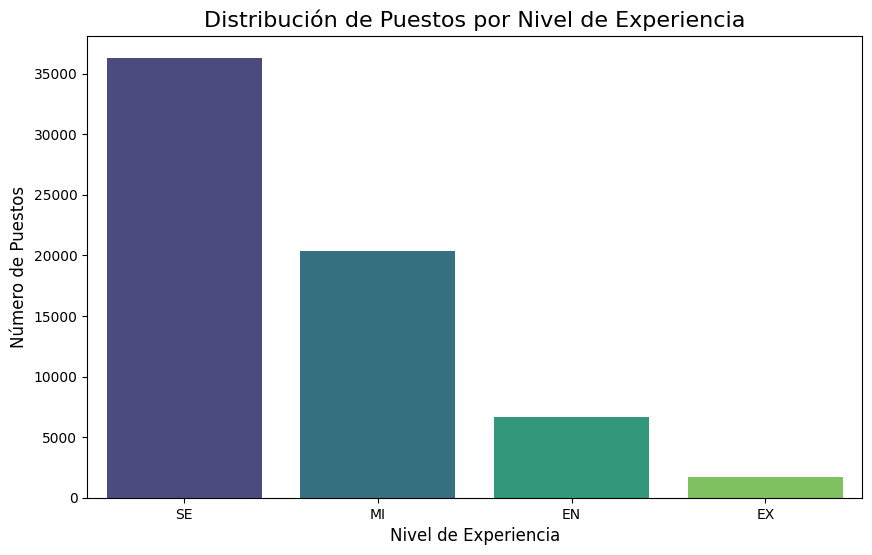

In [227]:
import seaborn as sns
import matplotlib.pyplot as plt

print("--- Distribuci√≥n por Nivel de Experiencia ---")

# Contar los valores y los porcentajes
experience_counts = df['experience_level'].value_counts()
experience_percentages = df['experience_level'].value_counts(normalize=True) * 100

print("Conteo:")
print(experience_counts)
print("\nPorcentaje (%):")
print(experience_percentages)

plt.figure(figsize=(10, 6))
sns.barplot(x=experience_counts.index, y=experience_counts.values, palette='viridis')
plt.title('Distribuci√≥n de Puestos por Nivel de Experiencia', fontsize=16)
plt.xlabel('Nivel de Experiencia', fontsize=12)
plt.ylabel('N√∫mero de Puestos', fontsize=12)
plt.show()

Senior and mid-level positions together account for 87% of the dataset. This means that any calculation of an ‚Äúaverage‚Äù salary we make will be heavily influenced by the salaries of profiles with considerable experience.

### Jobs

In [228]:
job_title_counts = df['job_title'].value_counts().head(15)

print("Los 15 puestos de trabajo m√°s comunes:")
print(job_title_counts)

Los 15 puestos de trabajo m√°s comunes:
job_title
Security Engineer               15478
Security Analyst                 5029
Manager                          3248
Software Engineer                2590
Analyst                          1914
Security Architect               1795
Systems Engineer                 1710
Consultant                       1599
DevSecOps Engineer               1375
Security Specialist              1132
Systems Administrator            1117
Program Manager                  1004
Information Security Officer      905
Cyber Security                    865
Network Engineer                  755
Name: count, dtype: int64


### Location

In [229]:
location_counts = df['company_location'].value_counts().head(10)

print("Los 10 pa√≠ses con m√°s puestos de trabajo:")
print(location_counts)

Los 10 pa√≠ses con m√°s puestos de trabajo:
company_location
US    58976
CA     2128
GB     1358
DE      481
NL      303
AU      297
AT      170
SK      146
FR      113
ES       89
Name: count, dtype: int64


It tells us that the dataset is not a global representation of tech salaries, but is overwhelmingly dominated by the United States.

* United States (US): 58,976 jobs, which is approximately 90.6% of the entire dataset.

* All other countries: The remaining 9 countries in the top 10 make up only a small fraction of the total.

### Size of the company

In [230]:
size_counts = df['company_size'].value_counts()

print("Conteo de trabajos por tama√±o de empresa:")
print(size_counts)

Conteo de trabajos por tama√±o de empresa:
company_size
M    62528
L     2365
S      224
Name: count, dtype: int64


The salary trends we observe will mainly reflect the compensation practices of medium-sized companies in the United States.

### Type of employement

In [231]:
employment_counts = df['employment_type'].value_counts()
print(employment_counts)

employment_type
FT    64817
PT      196
CT       93
FL       11
Name: count, dtype: int64


This output clearly shows the dataset is almost entirely composed of full-time (FT) positions, accounting for over 99.5% of all roles. Contract (CT), part-time (PT), and freelance (FL) roles are extremely rare.

In [232]:
residence_counts = df['employee_residence'].value_counts().head(10)
print(residence_counts)

employee_residence
US    58909
CA     2132
GB     1353
DE      479
NL      303
AU      298
AT      169
SK      147
FR      121
ES       96
Name: count, dtype: int64


This confirms that the employees' residences align almost perfectly with the company locations. Over 90% of the employees in the dataset live in the United States. This reinforces that our analysis is firmly centered on the US job market, with very little influence from international or remote work across borders.

### Remote Work Distribution

In [233]:
remote_counts = df['remote_ratio'].value_counts()
print(remote_counts)

remote_ratio
0      51677
100    12938
50       502
Name: count, dtype: int64


* Presencial (0): 51,677 jobs (79.4%)

* Remoto (100): 12,938 jobs (19.9%)

* Hybrid (50): 502 jobs (<1%)

## Data cleansing and preparation

In [234]:
df_clean = df.copy()
df_clean = df_clean.rename(columns={'Unnamed: 0': 'worker_id'})

# Distribuci√≥n de registros por a√±o
year_distribution = df['work_year'].value_counts().sort_index()
print("Distribuci√≥n de registros por a√±o:")
print(year_distribution)

# Porcentaje por a√±o
year_percentage = df['work_year'].value_counts(normalize=True).sort_index() * 100
print("\nPorcentaje de registros por a√±o:")
for year, pct in year_percentage.items():
    print(f"{year}: {pct:.1f}%")

Distribuci√≥n de registros por a√±o:
work_year
2020      246
2021      684
2022     1347
2023     3496
2024    24338
2025    35006
Name: count, dtype: int64

Porcentaje de registros por a√±o:
2020: 0.4%
2021: 1.1%
2022: 2.1%
2023: 5.4%
2024: 37.4%
2025: 53.8%


## VISUALIZACI√ìN DE LA EVOLUCI√ìN TEMPORAL

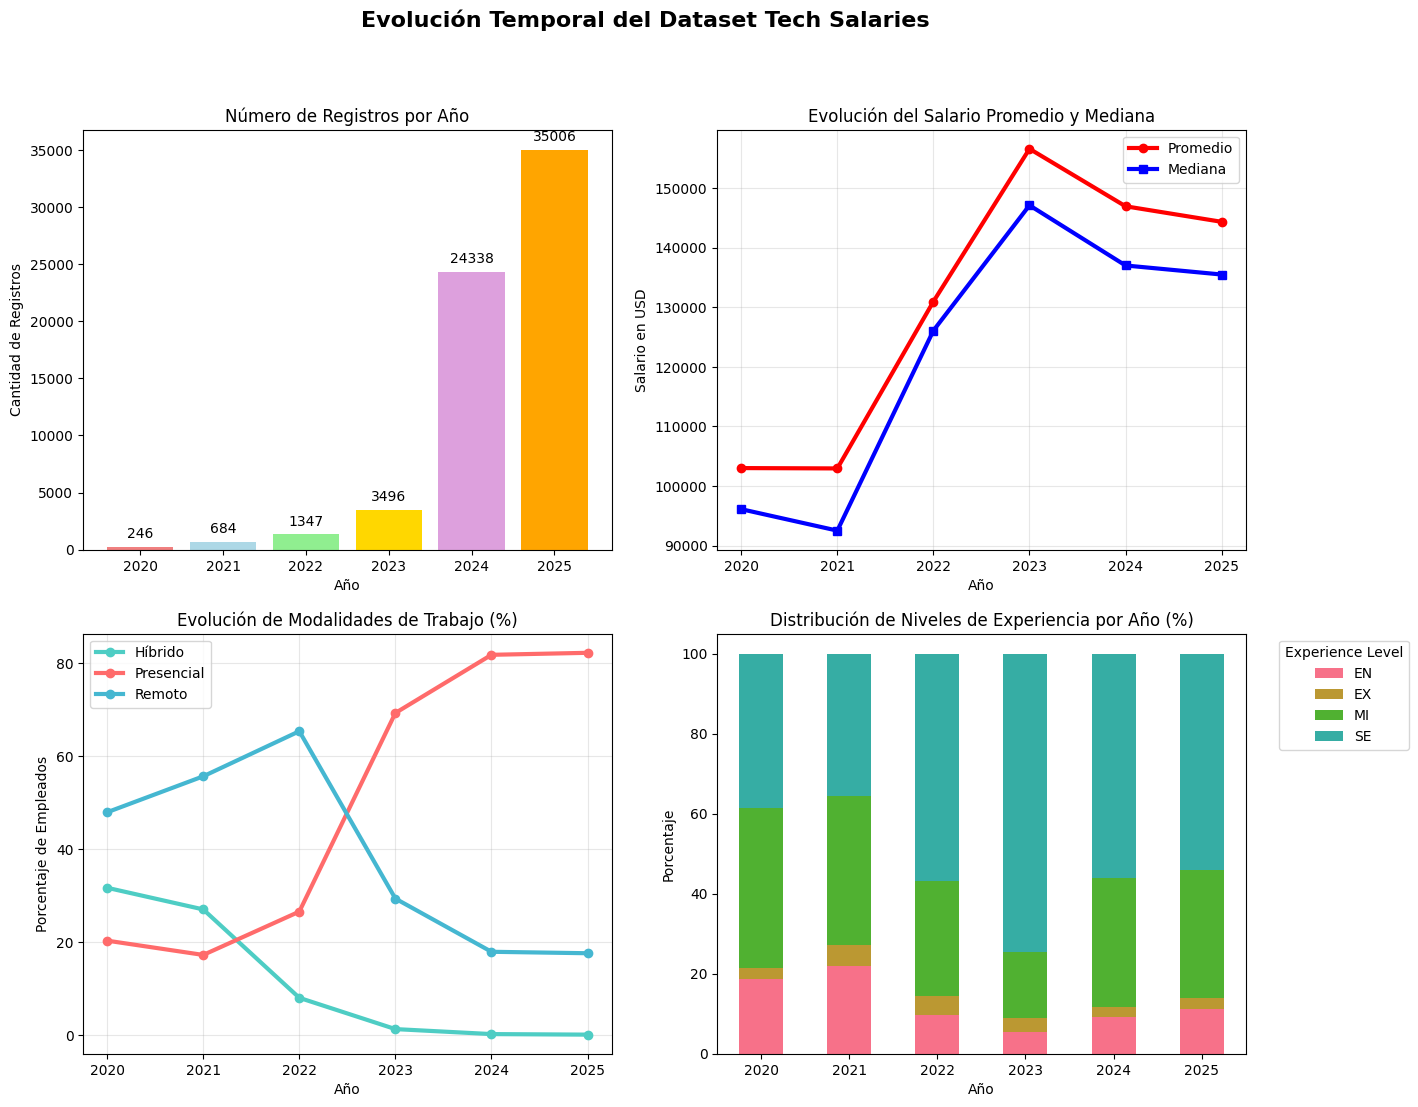

In [235]:
# Crear subplots para an√°lisis temporal
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Evoluci√≥n Temporal del Dataset Tech Salaries', fontsize=16, fontweight='bold')

# 1. Cantidad de registros por a√±o
axes[0,0].bar(year_distribution.index, year_distribution.values, 
              color=['lightcoral', 'lightblue', 'lightgreen', 'gold', 'plum', 'orange'][:len(year_distribution)])
axes[0,0].set_title('N√∫mero de Registros por A√±o')
axes[0,0].set_xlabel('A√±o')
axes[0,0].set_ylabel('Cantidad de Registros')
for i, v in enumerate(year_distribution.values):
    axes[0,0].text(year_distribution.index[i], v + 500, str(v), ha='center', va='bottom')

# 2. Evoluci√≥n del salario promedio por a√±o
salary_by_year = df.groupby('work_year')['salary_in_usd'].agg(['mean', 'median']).round(0)
axes[0,1].plot(salary_by_year.index, salary_by_year['mean'], marker='o', linewidth=3, label='Promedio', color='red')
axes[0,1].plot(salary_by_year.index, salary_by_year['median'], marker='s', linewidth=3, label='Mediana', color='blue')
axes[0,1].set_title('Evoluci√≥n del Salario Promedio y Mediana')
axes[0,1].set_xlabel('A√±o')
axes[0,1].set_ylabel('Salario en USD')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# 3. Evoluci√≥n del trabajo remoto por a√±o
df['work_mode'] = df['remote_ratio'].apply(lambda x: 'Presencial' if x == 0 
                                                    else 'H√≠brido' if x == 50 
                                                    else 'Remoto' if x == 100 
                                                    else 'Otro')

# Calcular distribuci√≥n por a√±o y modalidad
work_mode_by_year = pd.crosstab(df['work_year'], df['work_mode'], normalize='index') * 100

# Graficar evoluci√≥n de modalidades
work_mode_colors = {'Presencial': '#FF6B6B', 'H√≠brido': '#4ECDC4', 'Remoto': '#45B7D1', 'Otro': '#96CEB4'}
for mode in work_mode_by_year.columns:
    if mode in work_mode_colors:
        axes[1,0].plot(work_mode_by_year.index, work_mode_by_year[mode], 
                      marker='o', linewidth=3, label=mode, color=work_mode_colors[mode])

axes[1,0].set_title('Evoluci√≥n de Modalidades de Trabajo (%)')
axes[1,0].set_xlabel('A√±o')
axes[1,0].set_ylabel('Porcentaje de Empleados')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# 4. Distribuci√≥n de niveles de experiencia por a√±o
exp_by_year = pd.crosstab(df['work_year'], df['experience_level'], normalize='index') * 100
exp_by_year.plot(kind='bar', stacked=True, ax=axes[1,1])
axes[1,1].set_title('Distribuci√≥n de Niveles de Experiencia por A√±o (%)')
axes[1,1].set_xlabel('A√±o')
axes[1,1].set_ylabel('Porcentaje')
axes[1,1].legend(title='Experience Level', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1,1].tick_params(axis='x', rotation=0)

### AN√ÅLISIS DETALLADO DE MODALIDADES DE TRABAJO


AN√ÅLISIS DE MODALIDADES DE TRABAJO
Distribuci√≥n general de modalidades de trabajo:
Presencial: 51,677 empleados (79.4%)
Remoto: 12,938 empleados (19.9%)
H√≠brido: 502 empleados (0.8%)

Distribuci√≥n de modalidades por a√±o (%):
work_mode  H√≠brido  Presencial  Remoto
work_year                             
2020          31.7        20.3    48.0
2021          27.0        17.3    55.7
2022           8.0        26.6    65.4
2023           1.3        69.3    29.4
2024           0.2        81.9    17.9
2025           0.1        82.3    17.6


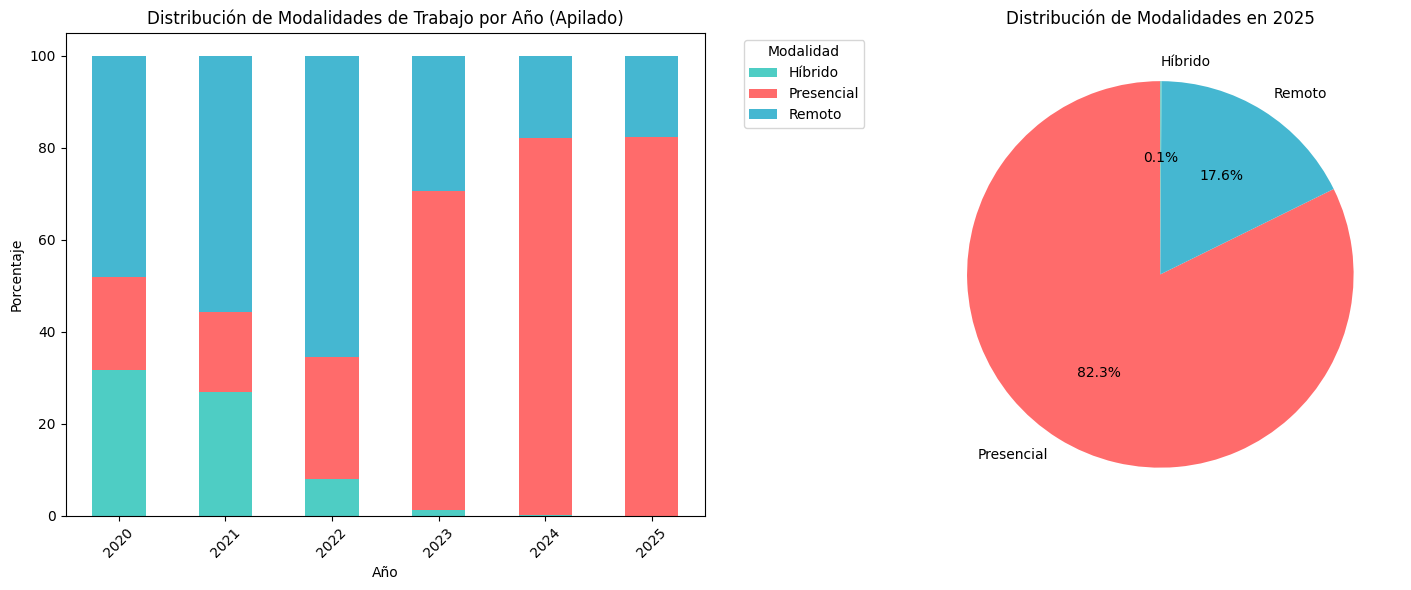

In [236]:
print("\n" + "="*60)
print("AN√ÅLISIS DE MODALIDADES DE TRABAJO")
print("="*60)

# Distribuci√≥n general de modalidades
work_mode_distribution = df['work_mode'].value_counts()
print("Distribuci√≥n general de modalidades de trabajo:")
for mode, count in work_mode_distribution.items():
    percentage = (count / len(df)) * 100
    print(f"{mode}: {count:,} empleados ({percentage:.1f}%)")

# Distribuci√≥n por a√±o
print("\nDistribuci√≥n de modalidades por a√±o (%):")
print(work_mode_by_year.round(1))

# Crear visualizaci√≥n adicional de modalidades
fig2, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gr√°fico de barras apiladas
work_mode_by_year.plot(kind='bar', stacked=True, ax=ax1, 
                      color=[work_mode_colors.get(col, 'gray') for col in work_mode_by_year.columns])
ax1.set_title('Distribuci√≥n de Modalidades de Trabajo por A√±o (Apilado)')
ax1.set_xlabel('A√±o')
ax1.set_ylabel('Porcentaje')
ax1.legend(title='Modalidad', bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.tick_params(axis='x', rotation=45)

# Gr√°fico circular para el a√±o m√°s reciente
latest_year = df['work_year'].max()
latest_distribution = df[df['work_year'] == latest_year]['work_mode'].value_counts()
colors_pie = [work_mode_colors.get(mode, 'gray') for mode in latest_distribution.index]
ax2.pie(latest_distribution.values, labels=latest_distribution.index, autopct='%1.1f%%', 
        colors=colors_pie, startangle=90)
ax2.set_title(f'Distribuci√≥n de Modalidades en {latest_year}')

plt.tight_layout()
plt.show()

## ESTAD√çSTICAS DETALLADAS POR A√ëO INCLUYENDO MODALIDADES

In [237]:
print("\n" + "="*60)
print("ESTAD√çSTICAS DETALLADAS POR A√ëO")
print("="*60)

# Crear tabla resumen por a√±o incluyendo modalidades
summary_by_year = df.groupby('work_year').agg({
    'salary_in_usd': ['count', 'mean', 'median', 'std'],
    'experience_level': lambda x: x.value_counts().index[0]  # Nivel m√°s com√∫n
}).round(2)

# Aplanar nombres de columnas
summary_by_year.columns = ['Count', 'Salary_Mean', 'Salary_Median', 'Salary_Std', 'Most_Common_Level']

# Agregar informaci√≥n de modalidades
for year in summary_by_year.index:
    year_data = df[df['work_year'] == year]
    most_common_mode = year_data['work_mode'].value_counts().index[0]
    summary_by_year.loc[year, 'Most_Common_Work_Mode'] = most_common_mode

print("Resumen por a√±o:")
print(summary_by_year)


ESTAD√çSTICAS DETALLADAS POR A√ëO
Resumen por a√±o:
           Count  Salary_Mean  Salary_Median  Salary_Std Most_Common_Level  \
work_year                                                                    
2020         246    102997.91        96099.0    58634.06                MI   
2021         684    102939.77        92500.0    58660.73                MI   
2022        1347    130948.37       126080.0    58814.85                SE   
2023        3496    156580.83       147100.0    62602.98                SE   
2024       24338    146934.89       137000.0    63800.85                SE   
2025       35006    144329.13       135482.0    61426.74                SE   

          Most_Common_Work_Mode  
work_year                        
2020                     Remoto  
2021                     Remoto  
2022                     Remoto  
2023                 Presencial  
2024                 Presencial  
2025                 Presencial  


### IDENTIFICACI√ìN DE PUNTOS DE INFLEXI√ìN (BOOM DE LA IA)

In [238]:
print("\n" + "="*60)
print("AN√ÅLISIS DE PUNTOS DE INFLEXI√ìN")
print("="*60)

# Calculamos cambios a√±o a a√±o
salary_changes = summary_by_year['Salary_Mean'].pct_change() * 100

print("Cambio porcentual en salario promedio a√±o a a√±o:")
for year in salary_changes.index[1:]:  # Empezar desde el segundo a√±o
    change = salary_changes[year]
    print(f"{year-1} -> {year}: {change:+.1f}%")

# An√°lisis de cambios en modalidades de trabajo
print("\nCambios en modalidades de trabajo:")
for year in work_mode_by_year.index[1:]:
    prev_year = year - 1
    if prev_year in work_mode_by_year.index:
        print(f"\nCambios {prev_year} -> {year}:")
        for mode in work_mode_by_year.columns:
            change = work_mode_by_year.loc[year, mode] - work_mode_by_year.loc[prev_year, mode]
            print(f"  {mode}: {change:+.1f} puntos porcentuales")

# Identificar a√±os con mayor crecimiento
max_salary_growth_year = salary_changes.idxmax()

print(f"\n" + "="*60)
print(f"A√ëO CON MAYOR CRECIMIENTO SALARIAL: {max_salary_growth_year}")
if not pd.isna(salary_changes[max_salary_growth_year]):
    print(f"Crecimiento: {salary_changes[max_salary_growth_year]:+.1f}%")
print("="*60)

print("\n" + "="*60)
print("CONTEXTO DEL BOOM DE LA IA:")
print("- 2022-2023: Lanzamiento de ChatGPT (Nov 2022)")
print("- 2023-2024: Boom de herramientas de IA generativa") 
print("- 2024-2025: Adopci√≥n masiva de IA en empresas")
print("¬øObservamos cambios significativos en estos per√≠odos?")
print("="*60)


AN√ÅLISIS DE PUNTOS DE INFLEXI√ìN
Cambio porcentual en salario promedio a√±o a a√±o:
2020 -> 2021: -0.1%
2021 -> 2022: +27.2%
2022 -> 2023: +19.6%
2023 -> 2024: -6.2%
2024 -> 2025: -1.8%

Cambios en modalidades de trabajo:

Cambios 2020 -> 2021:
  H√≠brido: -4.7 puntos porcentuales
  Presencial: -3.1 puntos porcentuales
  Remoto: +7.7 puntos porcentuales

Cambios 2021 -> 2022:
  H√≠brido: -19.0 puntos porcentuales
  Presencial: +9.3 puntos porcentuales
  Remoto: +9.7 puntos porcentuales

Cambios 2022 -> 2023:
  H√≠brido: -6.7 puntos porcentuales
  Presencial: +42.8 puntos porcentuales
  Remoto: -36.0 puntos porcentuales

Cambios 2023 -> 2024:
  H√≠brido: -1.1 puntos porcentuales
  Presencial: +12.5 puntos porcentuales
  Remoto: -11.4 puntos porcentuales

Cambios 2024 -> 2025:
  H√≠brido: -0.1 puntos porcentuales
  Presencial: +0.4 puntos porcentuales
  Remoto: -0.3 puntos porcentuales

A√ëO CON MAYOR CRECIMIENTO SALARIAL: 2022
Crecimiento: +27.2%

CONTEXTO DEL BOOM DE LA IA:
- 2022-20

HALLAZGOS PRINCIPALES:
Impacto Salarial de la IA:

2022: Mayor crecimiento salarial (+27.2%) - ¬°Justo cuando empez√≥ el boom de la IA!
2023: Segundo mayor crecimiento (+19.6%) - Post-ChatGPT
2024-2025: Desaceleraci√≥n (-6.2% y -1.8%) - Posible saturaci√≥n/normalizaci√≥n

Revoluci√≥n en Modalidades de Trabajo:

Pre-IA (2020-2022): Dominio del trabajo remoto (48-65%)
Post-IA (2023-2025): Regreso masivo al presencial (69-82%)
2023: El punto de inflexi√≥n - cambio de +42.8 puntos hacia presencial

## DEFINICI√ìN DE PER√çODOS PRE Y POST BOOM IA

In [239]:
print("="*70)
print("AN√ÅLISIS MULTIDIMENSIONAL DEL IMPACTO DE LA IA")
print("="*70)

# Definir per√≠odos basados en el boom de IA
# Pre-IA: 2020-2022 (antes de ChatGPT)
# Post-IA: 2023-2025 (despu√©s de ChatGPT)

df['period'] = df['work_year'].apply(lambda x: 'Pre-IA (2020-2022)' if x <= 2022 else 'Post-IA (2023-2025)')

print("Distribuci√≥n de registros por per√≠odo:")
period_dist = df['period'].value_counts()
for period, count in period_dist.items():
    percentage = (count / len(df)) * 100
    print(f"{period}: {count:,} registros ({percentage:.1f}%)")

AN√ÅLISIS MULTIDIMENSIONAL DEL IMPACTO DE LA IA
Distribuci√≥n de registros por per√≠odo:
Post-IA (2023-2025): 62,840 registros (96.5%)
Pre-IA (2020-2022): 2,277 registros (3.5%)


## AN√ÅLISIS POR NIVEL DE EXPERIENCIA

In [240]:
print("\n" + "="*70)
print("IMPACTO DE LA IA POR NIVEL DE EXPERIENCIA")
print("="*70)

exp_level_map = {
    'EN': 'Entry-level',
    'MI': 'Mid-level', 
    'SE': 'Senior',
    'EX': 'Executive'
}
df['experience_full'] = df['experience_level'].map(exp_level_map)

# An√°lisis salarial por experiencia y per√≠odo
exp_analysis = df.groupby(['period', 'experience_full'])['salary_in_usd'].agg([
    'count', 'mean', 'median', 'std'
]).round(0)

print("Estad√≠sticas salariales por experiencia y per√≠odo:")
print(exp_analysis)

# Calcular cambio porcentual Pre-IA vs Post-IA por experiencia
print("\nCambio salarial Pre-IA vs Post-IA por experiencia:")
for exp in exp_level_map.values():
    try:
        pre_salary = exp_analysis.loc[('Pre-IA (2020-2022)', exp), 'mean']
        post_salary = exp_analysis.loc[('Post-IA (2023-2025)', exp), 'mean']
        change = ((post_salary - pre_salary) / pre_salary) * 100
        print(f"{exp}: ${pre_salary:,.0f} -> ${post_salary:,.0f} ({change:+.1f}%)")
    except KeyError:
        print(f"{exp}: Datos insuficientes en alg√∫n per√≠odo")



IMPACTO DE LA IA POR NIVEL DE EXPERIENCIA
Estad√≠sticas salariales por experiencia y per√≠odo:
                                     count      mean    median      std
period              experience_full                                    
Post-IA (2023-2025) Entry-level       6375  103487.0   95000.0  47244.0
                    Executive         1622  195972.0  185000.0  82923.0
                    Mid-level        19635  130203.0  120780.0  57177.0
                    Senior           35208  160241.0  151200.0  60339.0
Pre-IA (2020-2022)  Entry-level        326   67829.0   65000.0  33310.0
                    Executive          108  182833.0  177500.0  75052.0
                    Mid-level          741   96970.0   91000.0  47612.0
                    Senior            1102  143759.0  140000.0  54836.0

Cambio salarial Pre-IA vs Post-IA por experiencia:
Entry-level: $67,829 -> $103,487 (+52.6%)
Mid-level: $96,970 -> $130,203 (+34.3%)
Senior: $143,759 -> $160,241 (+11.5%)
Executive: $

## AN√ÅLISIS POR TAMA√ëO DE EMPRESA

In [241]:
print("\n" + "="*70)
print("IMPACTO DE LA IA POR TAMA√ëO DE EMPRESA")
print("="*70)

scompany_size_map = {
    'S': 'Peque√±a (<50 empleados)',
    'M': 'Mediana (50-250 empleados)',
    'L': 'Grande (>250 empleados)'
}
df['company_size_full'] = df['company_size'].map(company_size_map)

# An√°lisis por tama√±o de empresa
size_analysis = df.groupby(['period', 'company_size_full'])['salary_in_usd'].agg([
    'count', 'mean', 'median'
]).round(0)

print("Salarios promedio por tama√±o de empresa y per√≠odo:")
print(size_analysis[['mean', 'median']])

# Cambio por tama√±o de empresa
print("\nCambio salarial por tama√±o de empresa:")
for size in company_size_map.values():
    try:
        pre_salary = size_analysis.loc[('Pre-IA (2020-2022)', size), 'mean']
        post_salary = size_analysis.loc[('Post-IA (2023-2025)', size), 'mean']
        change = ((post_salary - pre_salary) / pre_salary) * 100
        print(f"{size}: ${pre_salary:,.0f} -> ${post_salary:,.0f} ({change:+.1f}%)")
    except KeyError:
        print(f"{size}: Datos insuficientes en alg√∫n per√≠odo")


IMPACTO DE LA IA POR TAMA√ëO DE EMPRESA
Salarios promedio por tama√±o de empresa y per√≠odo:
                                                    mean    median
period              company_size_full                             
Post-IA (2023-2025) Grande (>250 empleados)     164123.0  143300.0
                    Mediana (50-250 empleados)  145683.0  137000.0
                    Peque√±a (<50 empleados)      83365.0   62390.0
Pre-IA (2020-2022)  Grande (>250 empleados)     116915.0  105000.0
                    Mediana (50-250 empleados)  129171.0  128875.0
                    Peque√±a (<50 empleados)      79740.0   69870.0

Cambio salarial por tama√±o de empresa:
Peque√±a (<50 empleados): $79,740 -> $83,365 (+4.5%)
Mediana (50-250 empleados): $129,171 -> $145,683 (+12.8%)
Grande (>250 empleados): $116,915 -> $164,123 (+40.4%)


## AN√ÅLISIS GEOGR√ÅFICO (TOP PA√çSES)

In [242]:
print("\n" + "="*70)
print("IMPACTO DE LA IA POR GEOGRAF√çA (TOP PA√çSES)")
print("="*70)

top_countries = df['company_location'].value_counts().head(10).index.tolist()

# An√°lisis por pa√≠s
geo_comparison = []
for country in top_countries:
    country_data = df[df['company_location'] == country]
    
    pre_data = country_data[country_data['period'] == 'Pre-IA (2020-2022)']
    post_data = country_data[country_data['period'] == 'Post-IA (2023-2025)']
    
    if len(pre_data) > 10 and len(post_data) > 10:  # Solo pa√≠ses con datos suficientes
        pre_salary = pre_data['salary_in_usd'].mean()
        post_salary = post_data['salary_in_usd'].mean()
        change = ((post_salary - pre_salary) / pre_salary) * 100
        
        geo_comparison.append({
            'Country': country,
            'Pre_IA_Salary': pre_salary,
            'Post_IA_Salary': post_salary,
            'Change_%': change,
            'Pre_Count': len(pre_data),
            'Post_Count': len(post_data)
        })

geo_df = pd.DataFrame(geo_comparison).sort_values('Change_%', ascending=False)
print("Cambio salarial por pa√≠s (solo pa√≠ses con datos suficientes):")
print(geo_df.round(0))



IMPACTO DE LA IA POR GEOGRAF√çA (TOP PA√çSES)
Cambio salarial por pa√≠s (solo pa√≠ses con datos suficientes):
  Country  Pre_IA_Salary  Post_IA_Salary  Change_%  Pre_Count  Post_Count
7      ES        54475.0         81090.0      49.0         32          57
3      DE        81181.0        106192.0      31.0         69         412
1      CA       113364.0        128436.0      13.0        102        2026
0      US       136245.0        150116.0      10.0       1597       57379
4      NL        72722.0         77540.0       7.0         21         282
5      AU       124630.0        126683.0       2.0         25         272
6      FR        72558.0         71635.0      -1.0         40          73
2      GB        89792.0         85409.0      -5.0        128        1230


## VISUALIZACIONES MULTIDIMENSIONALES

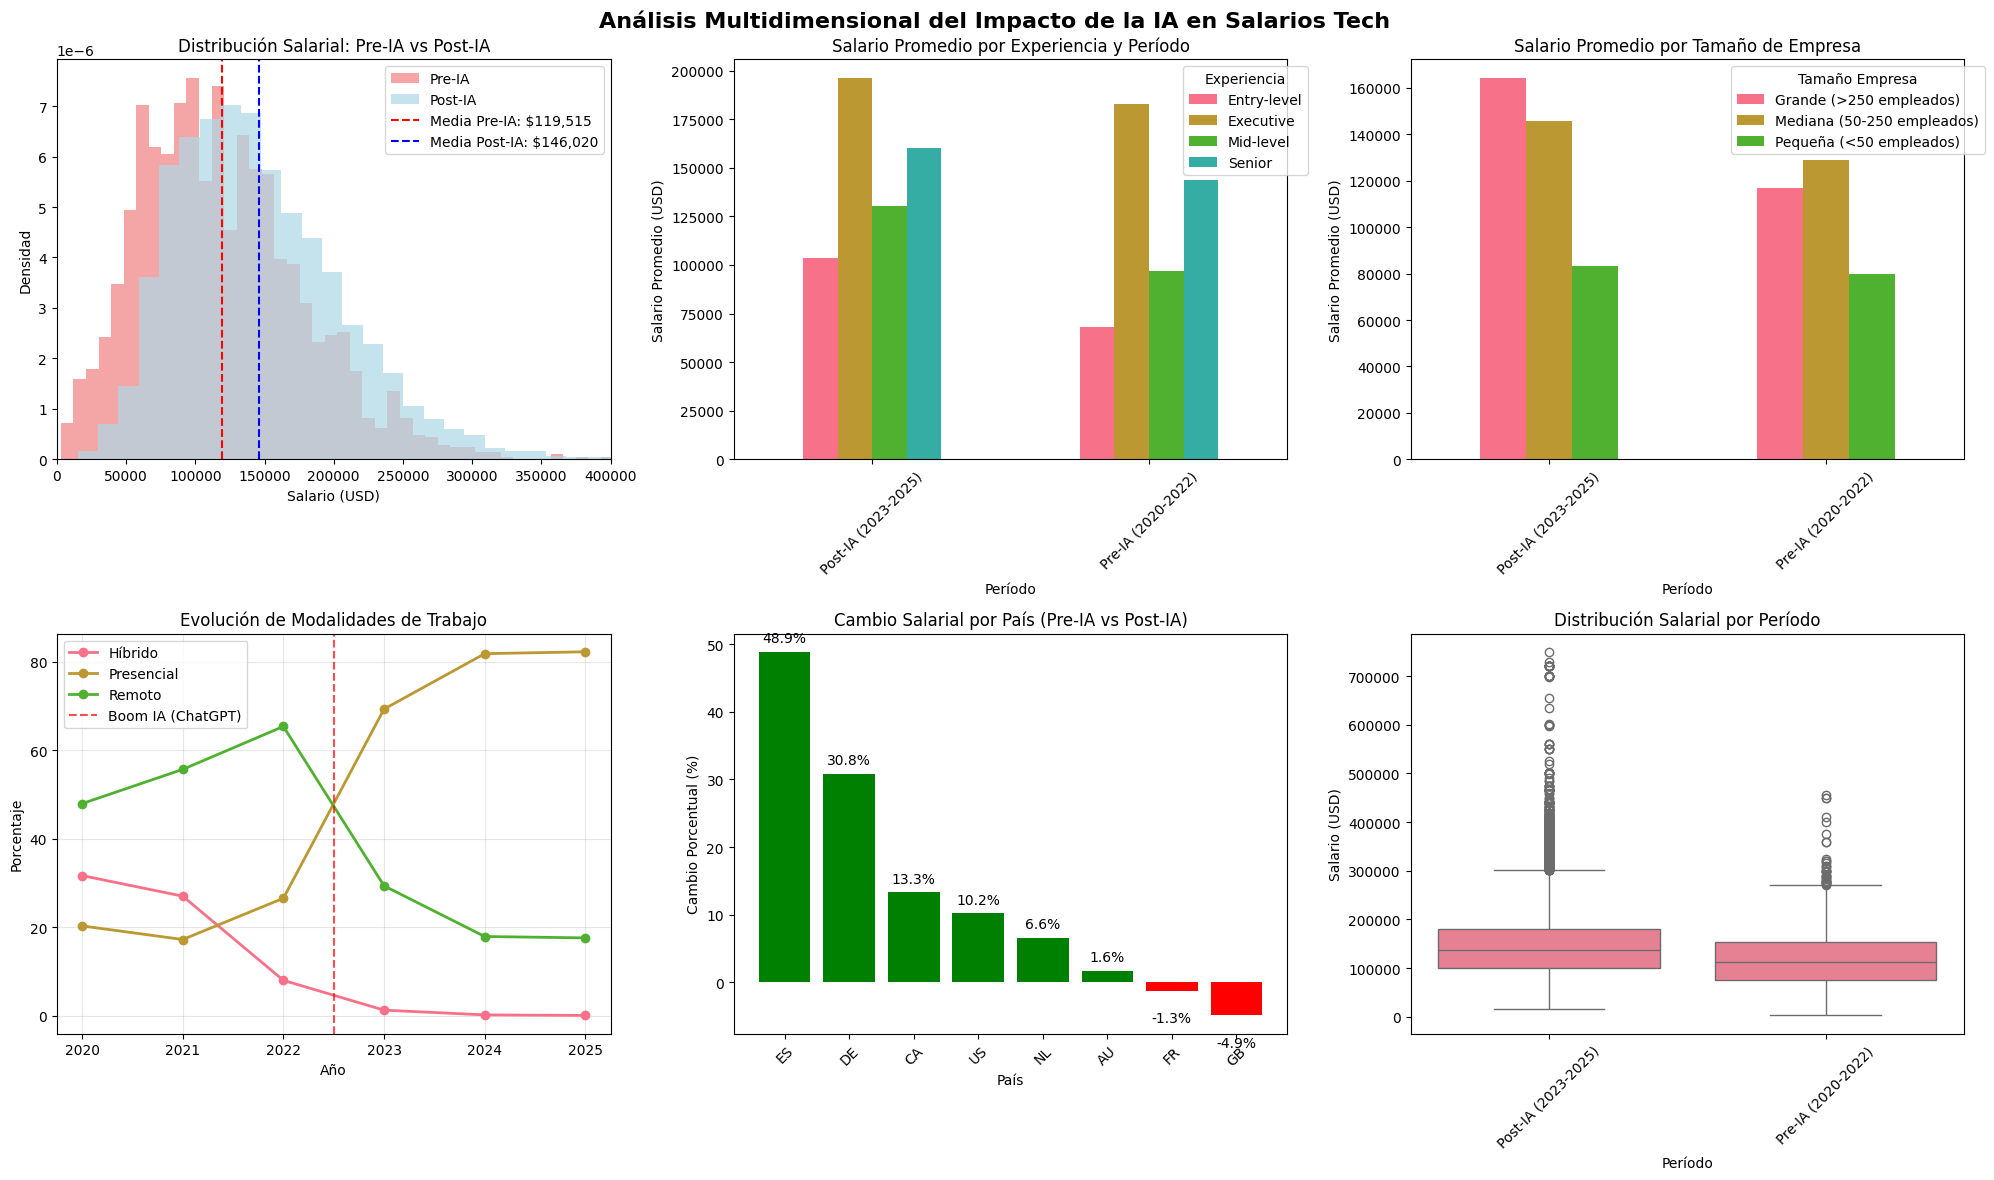

In [243]:
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('An√°lisis Multidimensional del Impacto de la IA en Salarios Tech', fontsize=16, fontweight='bold')

# 1. Distribuci√≥n salarial Pre vs Post IA
pre_ia_salaries = df[df['period'] == 'Pre-IA (2020-2022)']['salary_in_usd']
post_ia_salaries = df[df['period'] == 'Post-IA (2023-2025)']['salary_in_usd']

axes[0,0].hist(pre_ia_salaries, bins=50, alpha=0.7, label='Pre-IA', color='lightcoral', density=True)
axes[0,0].hist(post_ia_salaries, bins=50, alpha=0.7, label='Post-IA', color='lightblue', density=True)
axes[0,0].axvline(pre_ia_salaries.mean(), color='red', linestyle='--', label=f'Media Pre-IA: ${pre_ia_salaries.mean():,.0f}')
axes[0,0].axvline(post_ia_salaries.mean(), color='blue', linestyle='--', label=f'Media Post-IA: ${post_ia_salaries.mean():,.0f}')
axes[0,0].set_title('Distribuci√≥n Salarial: Pre-IA vs Post-IA')
axes[0,0].set_xlabel('Salario (USD)')
axes[0,0].set_ylabel('Densidad')
axes[0,0].legend()
axes[0,0].set_xlim(0, 400000)

# 2. Salarios por nivel de experiencia
exp_pivot = df.pivot_table(values='salary_in_usd', index='period', columns='experience_full', aggfunc='mean')
exp_pivot.plot(kind='bar', ax=axes[0,1])
axes[0,1].set_title('Salario Promedio por Experiencia y Per√≠odo')
axes[0,1].set_xlabel('Per√≠odo')
axes[0,1].set_ylabel('Salario Promedio (USD)')
axes[0,1].legend(title='Experiencia', bbox_to_anchor=(1.05, 1))
axes[0,1].tick_params(axis='x', rotation=45)

# 3. Salarios por tama√±o de empresa
size_pivot = df.pivot_table(values='salary_in_usd', index='period', columns='company_size_full', aggfunc='mean')
size_pivot.plot(kind='bar', ax=axes[0,2])
axes[0,2].set_title('Salario Promedio por Tama√±o de Empresa')
axes[0,2].set_xlabel('Per√≠odo')
axes[0,2].set_ylabel('Salario Promedio (USD)')
axes[0,2].legend(title='Tama√±o Empresa', bbox_to_anchor=(1.05, 1))
axes[0,2].tick_params(axis='x', rotation=45)

# 4. Evoluci√≥n de modalidades de trabajo (del paso anterior)
work_mode_evolution = df.groupby(['work_year', 'work_mode']).size().unstack(fill_value=0)
work_mode_evolution_pct = work_mode_evolution.div(work_mode_evolution.sum(axis=1), axis=0) * 100

for mode in work_mode_evolution_pct.columns:
    axes[1,0].plot(work_mode_evolution_pct.index, work_mode_evolution_pct[mode], 
                   marker='o', linewidth=2, label=mode)

axes[1,0].axvline(2022.5, color='red', linestyle='--', alpha=0.7, label='Boom IA (ChatGPT)')
axes[1,0].set_title('Evoluci√≥n de Modalidades de Trabajo')
axes[1,0].set_xlabel('A√±o')
axes[1,0].set_ylabel('Porcentaje')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# 5. Top pa√≠ses - cambio salarial
if len(geo_df) > 0:
    geo_plot_data = geo_df.head(8)  # Top 8 pa√≠ses
    bars = axes[1,1].bar(range(len(geo_plot_data)), geo_plot_data['Change_%'], 
                        color=['green' if x > 0 else 'red' for x in geo_plot_data['Change_%']])
    axes[1,1].set_title('Cambio Salarial por Pa√≠s (Pre-IA vs Post-IA)')
    axes[1,1].set_xlabel('Pa√≠s')
    axes[1,1].set_ylabel('Cambio Porcentual (%)')
    axes[1,1].set_xticks(range(len(geo_plot_data)))
    axes[1,1].set_xticklabels(geo_plot_data['Country'], rotation=45)
    
    # Agregar valores en las barras
    for i, bar in enumerate(bars):
        height = bar.get_height()
        axes[1,1].text(bar.get_x() + bar.get_width()/2., height + (1 if height > 0 else -3),
                      f'{height:.1f}%', ha='center', va='bottom' if height > 0 else 'top')

# 6. Box plot comparativo por per√≠odo
sns.boxplot(data=df, x='period', y='salary_in_usd', ax=axes[1,2])
axes[1,2].set_title('Distribuci√≥n Salarial por Per√≠odo')
axes[1,2].set_xlabel('Per√≠odo')
axes[1,2].set_ylabel('Salario (USD)')
axes[1,2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## PRUEBAS ESTAD√çSTICAS

In [244]:
print("\n" + "="*70)
print("PRUEBAS ESTAD√çSTICAS: SIGNIFICANCIA DEL IMPACTO DE LA IA")
print("="*70)

# Test t para comparar salarios pre vs post IA
pre_salaries = df[df['period'] == 'Pre-IA (2020-2022)']['salary_in_usd']
post_salaries = df[df['period'] == 'Post-IA (2023-2025)']['salary_in_usd']

# Prueba t de dos muestras independientes
t_stat, p_value = stats.ttest_ind(post_salaries, pre_salaries)

print(f"Prueba t-Student (Post-IA vs Pre-IA):")
print(f"  Estad√≠stica t: {t_stat:.4f}")
print(f"  Valor p: {p_value:.2e}")
print(f"  Diferencia significativa: {'S√ç' if p_value < 0.05 else 'NO'} (Œ± = 0.05)")

print(f"\nEstad√≠sticas descriptivas:")
print(f"  Pre-IA - Media: ${pre_salaries.mean():,.0f}, Mediana: ${pre_salaries.median():,.0f}")
print(f"  Post-IA - Media: ${post_salaries.mean():,.0f}, Mediana: ${post_salaries.median():,.0f}")
print(f"  Diferencia en media: ${post_salaries.mean() - pre_salaries.mean():,.0f}")
print(f"  Cambio porcentual: {((post_salaries.mean() - pre_salaries.mean()) / pre_salaries.mean()) * 100:.1f}%")


PRUEBAS ESTAD√çSTICAS: SIGNIFICANCIA DEL IMPACTO DE LA IA
Prueba t-Student (Post-IA vs Pre-IA):
  Estad√≠stica t: 19.9074
  Valor p: 6.42e-88
  Diferencia significativa: S√ç (Œ± = 0.05)

Estad√≠sticas descriptivas:
  Pre-IA - Media: $119,515, Mediana: $112,900
  Post-IA - Media: $146,020, Mediana: $137,000
  Diferencia en media: $26,505
  Cambio porcentual: 22.2%


In [245]:
print("\n" + "="*70)
print("RESUMEN DE HALLAZGOS PRINCIPALES")
print("="*70)

change_pct = ((post_salaries.mean() - pre_salaries.mean()) / pre_salaries.mean()) * 100

print(f"1. IMPACTO SALARIAL GLOBAL:")
print(f"   ‚Ä¢ Cambio promedio: {change_pct:+.1f}%")
print(f"   ‚Ä¢ Significancia estad√≠stica: {'S√ç' if p_value < 0.05 else 'NO'}")

print(f"\n2. PER√çODO CR√çTICO:")
print(f"   ‚Ä¢ Pre-IA (2020-2022): {len(pre_salaries):,} registros")
print(f"   ‚Ä¢ Post-IA (2023-2025): {len(post_salaries):,} registros")

print("="*70)


RESUMEN DE HALLAZGOS PRINCIPALES
1. IMPACTO SALARIAL GLOBAL:
   ‚Ä¢ Cambio promedio: +22.2%
   ‚Ä¢ Significancia estad√≠stica: S√ç

2. PER√çODO CR√çTICO:
   ‚Ä¢ Pre-IA (2020-2022): 2,277 registros
   ‚Ä¢ Post-IA (2023-2025): 62,840 registros


HALLAZGOs: Impacto Diferenciado por Experiencia:

Entry-level: +52.6% üéØ ¬°Los juniors fueron los M√ÅS beneficiados!
Mid-level: +34.3% üìà Segundo lugar en crecimiento
Senior: +11.5% üìä Menor crecimiento relativo
Executive: +7.2% üëî El menor impacto
üè¢ Impacto por Tama√±o de Empresa:

Grandes empresas: +40.4% üí∞ Las m√°s agresivas pagando
Medianas: +12.8% üìä Crecimiento moderado
Peque√±as: +4.5% üò¨ Casi sin cambio
üåç Impacto Geogr√°fico (¬°Espa√±a liderando!):

Espa√±a: +49% üá™üá∏ ¬°El mayor crecimiento!
Alemania: +31% üá©üá™ Segundo lugar
Canad√°: +13% üá®üá¶, US: +10% üá∫üá∏
Francia: -1% üá´üá∑, UK: -5% üá¨üáß (¬°Negativos!)
üìà Significancia Estad√≠stica:

p-value: 6.42e-88 ‚Üí ¬°S√öPER significativo!
+22.2% de crecimiento promedio ‚Üí Impacto real y masivo
üéØ INSIGHTS CLAVE:
Los juniors se beneficiaron M√ÅS que los seniors - ¬øPor qu√©? ¬øM√°s adaptables a IA?
Las grandes empresas pagaron mucho m√°s - ¬øGuerra de talento tech?
Espa√±a tuvo el mayor boom - ¬øHub emergente de tech?
El impacto es estad√≠sticamente REAL - No es casualidad

## DETECCI√ìN DE OUTLIERS SALARIALES

In [246]:
def detect_outliers_iqr(data, column):
    """Detecta outliers usando el m√©todo IQR"""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Detectar outliers por per√≠odo
print("DETECCI√ìN DE OUTLIERS SALARIALES")
print("="*50)

pre_ia = df[df['period'] == 'Pre-IA (2020-2022)']
post_ia = df[df['period'] == 'Post-IA (2023-2025)']

# Outliers Pre-IA
outliers_pre = detect_outliers_iqr(pre_ia, 'salary_in_usd')
print(f"Outliers Pre-IA: {len(outliers_pre)} ({len(outliers_pre)/len(pre_ia)*100:.1f}%)")

# Outliers Post-IA
outliers_post = detect_outliers_iqr(post_ia, 'salary_in_usd')
print(f"Outliers Post-IA: {len(outliers_post)} ({len(outliers_post)/len(post_ia)*100:.1f}%)")

# Top salarios extremos
print("\nTOP 10 SALARIOS M√ÅS ALTOS POST-IA:")
top_salaries_post = post_ia.nlargest(10, 'salary_in_usd')[['job_title', 'salary_in_usd', 'experience_level', 
                                                          'company_size_full', 'company_location', 'work_year']]
for idx, row in top_salaries_post.iterrows():
    print(f"  ${row['salary_in_usd']:,} - {row['job_title']} ({row['experience_level']}) - {row['company_location']} - {row['work_year']}")

print("\nTOP 10 SALARIOS M√ÅS ALTOS PRE-IA:")
top_salaries_pre = pre_ia.nlargest(10, 'salary_in_usd')[['job_title', 'salary_in_usd', 'experience_level', 
                                                        'company_size_full', 'company_location', 'work_year']]
for idx, row in top_salaries_pre.iterrows():
    print(f"  ${row['salary_in_usd']:,} - {row['job_title']} ({row['experience_level']}) - {row['company_location']} - {row['work_year']}")

DETECCI√ìN DE OUTLIERS SALARIALES
Outliers Pre-IA: 35 (1.5%)
Outliers Post-IA: 983 (1.6%)

TOP 10 SALARIOS M√ÅS ALTOS POST-IA:
  $750,000 - Information Security Officer (EX) - US - 2025
  $730,000 - Compliance Officer (EX) - US - 2025
  $720,000 - Security Engineer (MI) - US - 2025
  $720,000 - Security Engineer (MI) - US - 2025
  $720,000 - Software Engineer (SE) - US - 2025
  $720,000 - Security Engineer (SE) - US - 2025
  $720,000 - Security Engineer (MI) - MX - 2025
  $720,000 - Security Engineer (SE) - US - 2025
  $720,000 - Security Engineer (SE) - MX - 2025
  $720,000 - Software Engineer (MI) - US - 2025

TOP 10 SALARIOS M√ÅS ALTOS PRE-IA:
  $456,621 - Ethical Hacker (MI) - GB - 2020
  $450,000 - Staff Security Engineer (SE) - US - 2022
  $450,000 - Staff Security Engineer (SE) - US - 2021
  $410,000 - Cyber Security Engineer (MI) - IN - 2022
  $400,000 - Information Security Officer (EX) - US - 2021
  $375,000 - Information Security Officer (EX) - US - 2021
  $360,000 - Informa

## AN√ÅLISIS DE ROLES CON MAYOR CRECIMIENTO

In [247]:
print("\n" + "="*70)
print("ROLES CON MAYOR IMPACTO SALARIAL")
print("="*70)

# Calcular crecimiento salarial por rol (solo roles con suficientes datos)
role_growth_analysis = []

# Obtener roles que aparecen en ambos per√≠odos con al menos 10 registros cada uno
roles_pre = pre_ia['job_title'].value_counts()
roles_post = post_ia['job_title'].value_counts()

common_roles = set(roles_pre[roles_pre >= 5].index) & set(roles_post[roles_post >= 10].index)

for role in common_roles:
    pre_salary = pre_ia[pre_ia['job_title'] == role]['salary_in_usd'].mean()
    post_salary = post_ia[post_ia['job_title'] == role]['salary_in_usd'].mean()
    
    pre_count = len(pre_ia[pre_ia['job_title'] == role])
    post_count = len(post_ia[post_ia['job_title'] == role])
    
    growth_pct = ((post_salary - pre_salary) / pre_salary) * 100
    
    role_growth_analysis.append({
        'Role': role,
        'Pre_IA_Salary': pre_salary,
        'Post_IA_Salary': post_salary,
        'Growth_%': growth_pct,
        'Pre_Count': pre_count,
        'Post_Count': post_count,
        'Total_Impact': growth_pct * post_count  # Impacto ponderado por volumen
    })

# Convertir a DataFrame y ordenar
role_growth_df = pd.DataFrame(role_growth_analysis).sort_values('Growth_%', ascending=False)

print("TOP 15 ROLES CON MAYOR CRECIMIENTO SALARIAL:")
for idx, row in role_growth_df.head(15).iterrows():
    print(f"  {row['Role'][:50]}: ${row['Pre_IA_Salary']:,.0f} -> ${row['Post_IA_Salary']:,.0f} ({row['Growth_%']:+.1f}%) [{row['Post_Count']} empleados]")

print("\nTOP 10 ROLES CON MENOR CRECIMIENTO (o decrecimiento):")
for idx, row in role_growth_df.tail(10).iterrows():
    print(f"  {row['Role'][:50]}: ${row['Pre_IA_Salary']:,.0f} -> ${row['Post_IA_Salary']:,.0f} ({row['Growth_%']:+.1f}%) [{row['Post_Count']} empleados]")


ROLES CON MAYOR IMPACTO SALARIAL
TOP 15 ROLES CON MAYOR CRECIMIENTO SALARIAL:
  Penetration Testing Engineer: $109,969 -> $168,986 (+53.7%) [57 empleados]
  Data Scientist: $106,944 -> $160,961 (+50.5%) [112 empleados]
  Cyber Security Consultant: $94,184 -> $138,584 (+47.1%) [14 empleados]
  Cyber Security Specialist: $77,882 -> $109,074 (+40.1%) [182 empleados]
  Cyber Threat Analyst: $97,122 -> $130,425 (+34.3%) [131 empleados]
  Security Operations Analyst: $86,991 -> $114,904 (+32.1%) [237 empleados]
  Data Analyst: $94,740 -> $121,031 (+27.8%) [72 empleados]
  Compliance Analyst: $89,833 -> $114,721 (+27.7%) [689 empleados]
  Penetration Tester: $104,757 -> $132,658 (+26.6%) [589 empleados]
  Security Researcher: $140,504 -> $177,125 (+26.1%) [515 empleados]
  Information Security Analyst: $87,928 -> $109,115 (+24.1%) [198 empleados]
  Cyber Security Architect: $132,379 -> $161,967 (+22.4%) [10 empleados]
  DevSecOps Engineer: $119,339 -> $139,160 (+16.6%) [1324 empleados]
  SOC

## AN√ÅLISIS DE CLUSTERING DE PERFILES SALARIALES

In [248]:
print("\n" + "="*70)
print("CLUSTERING DE PERFILES SALARIALES")
print("="*70)

# Preparar datos para clustering (solo Post-IA para mejor insights)
cluster_data = post_ia.copy()

# Encoding de variables categ√≥ricas
from sklearn.preprocessing import LabelEncoder

# Crear variables num√©ricas para clustering
le_experience = LabelEncoder()
le_company_size = LabelEncoder()
le_work_mode = LabelEncoder()

cluster_features = pd.DataFrame({
    'salary_in_usd': cluster_data['salary_in_usd'],
    'experience_encoded': le_experience.fit_transform(cluster_data['experience_level']),
    'company_size_encoded': le_company_size.fit_transform(cluster_data['company_size']),
    'work_mode_encoded': le_work_mode.fit_transform(cluster_data['work_mode']),
    'remote_ratio': cluster_data['remote_ratio'],
    'work_year': cluster_data['work_year']
})

# Normalizar los datos
scaler = StandardScaler()
cluster_features_scaled = scaler.fit_transform(cluster_features)

# Aplicar K-means
kmeans = KMeans(n_clusters=5, random_state=42)
cluster_labels = kmeans.fit_predict(cluster_features_scaled)

# Agregar labels al dataset
cluster_data['cluster'] = cluster_labels

# Analizar caracter√≠sticas de cada cluster
print("CARACTER√çSTICAS DE LOS CLUSTERS:")
cluster_summary = cluster_data.groupby('cluster').agg({
    'salary_in_usd': ['mean', 'median', 'count'],
    'experience_level': lambda x: x.mode()[0],
    'company_size': lambda x: x.mode()[0], 
    'work_mode': lambda x: x.mode()[0],
    'remote_ratio': 'mean',
    'work_year': 'mean'
}).round(0)

for cluster in range(5):
    cluster_info = cluster_summary.loc[cluster]
    print(f"\n  CLUSTER {cluster}:")
    print(f"    Empleados: {cluster_info[('salary_in_usd', 'count')]:,.0f}")
    print(f"    Salario promedio: ${cluster_info[('salary_in_usd', 'mean')]:,.0f}")
    print(f"    Experiencia t√≠pica: {cluster_info[('experience_level', '<lambda>')]}")
    print(f"    Empresa t√≠pica: {cluster_info[('company_size', '<lambda>')]}")
    print(f"    Modalidad t√≠pica: {cluster_info[('work_mode', '<lambda>')]}")
    print(f"    Remote ratio promedio: {cluster_info[('remote_ratio', 'mean')]:.0f}%")


CLUSTERING DE PERFILES SALARIALES
CARACTER√çSTICAS DE LOS CLUSTERS:

  CLUSTER 0:
    Empleados: 6,136
    Salario promedio: $107,237
    Experiencia t√≠pica: EN
    Empresa t√≠pica: M
    Modalidad t√≠pica: Presencial
    Remote ratio promedio: 0%

  CLUSTER 1:
    Empleados: 11,170
    Salario promedio: $152,182
    Experiencia t√≠pica: SE
    Empresa t√≠pica: M
    Modalidad t√≠pica: Remoto
    Remote ratio promedio: 100%

  CLUSTER 2:
    Empleados: 24,671
    Salario promedio: $147,426
    Experiencia t√≠pica: SE
    Empresa t√≠pica: M
    Modalidad t√≠pica: Presencial
    Remote ratio promedio: 0%

  CLUSTER 3:
    Empleados: 1,297
    Salario promedio: $164,123
    Experiencia t√≠pica: SE
    Empresa t√≠pica: L
    Modalidad t√≠pica: Presencial
    Remote ratio promedio: 34%

  CLUSTER 4:
    Empleados: 19,566
    Salario promedio: $151,691
    Experiencia t√≠pica: SE
    Empresa t√≠pica: M
    Modalidad t√≠pica: Presencial
    Remote ratio promedio: 0%


## VISUALIZACIONES DE OUTLIERS Y CLUSTERING

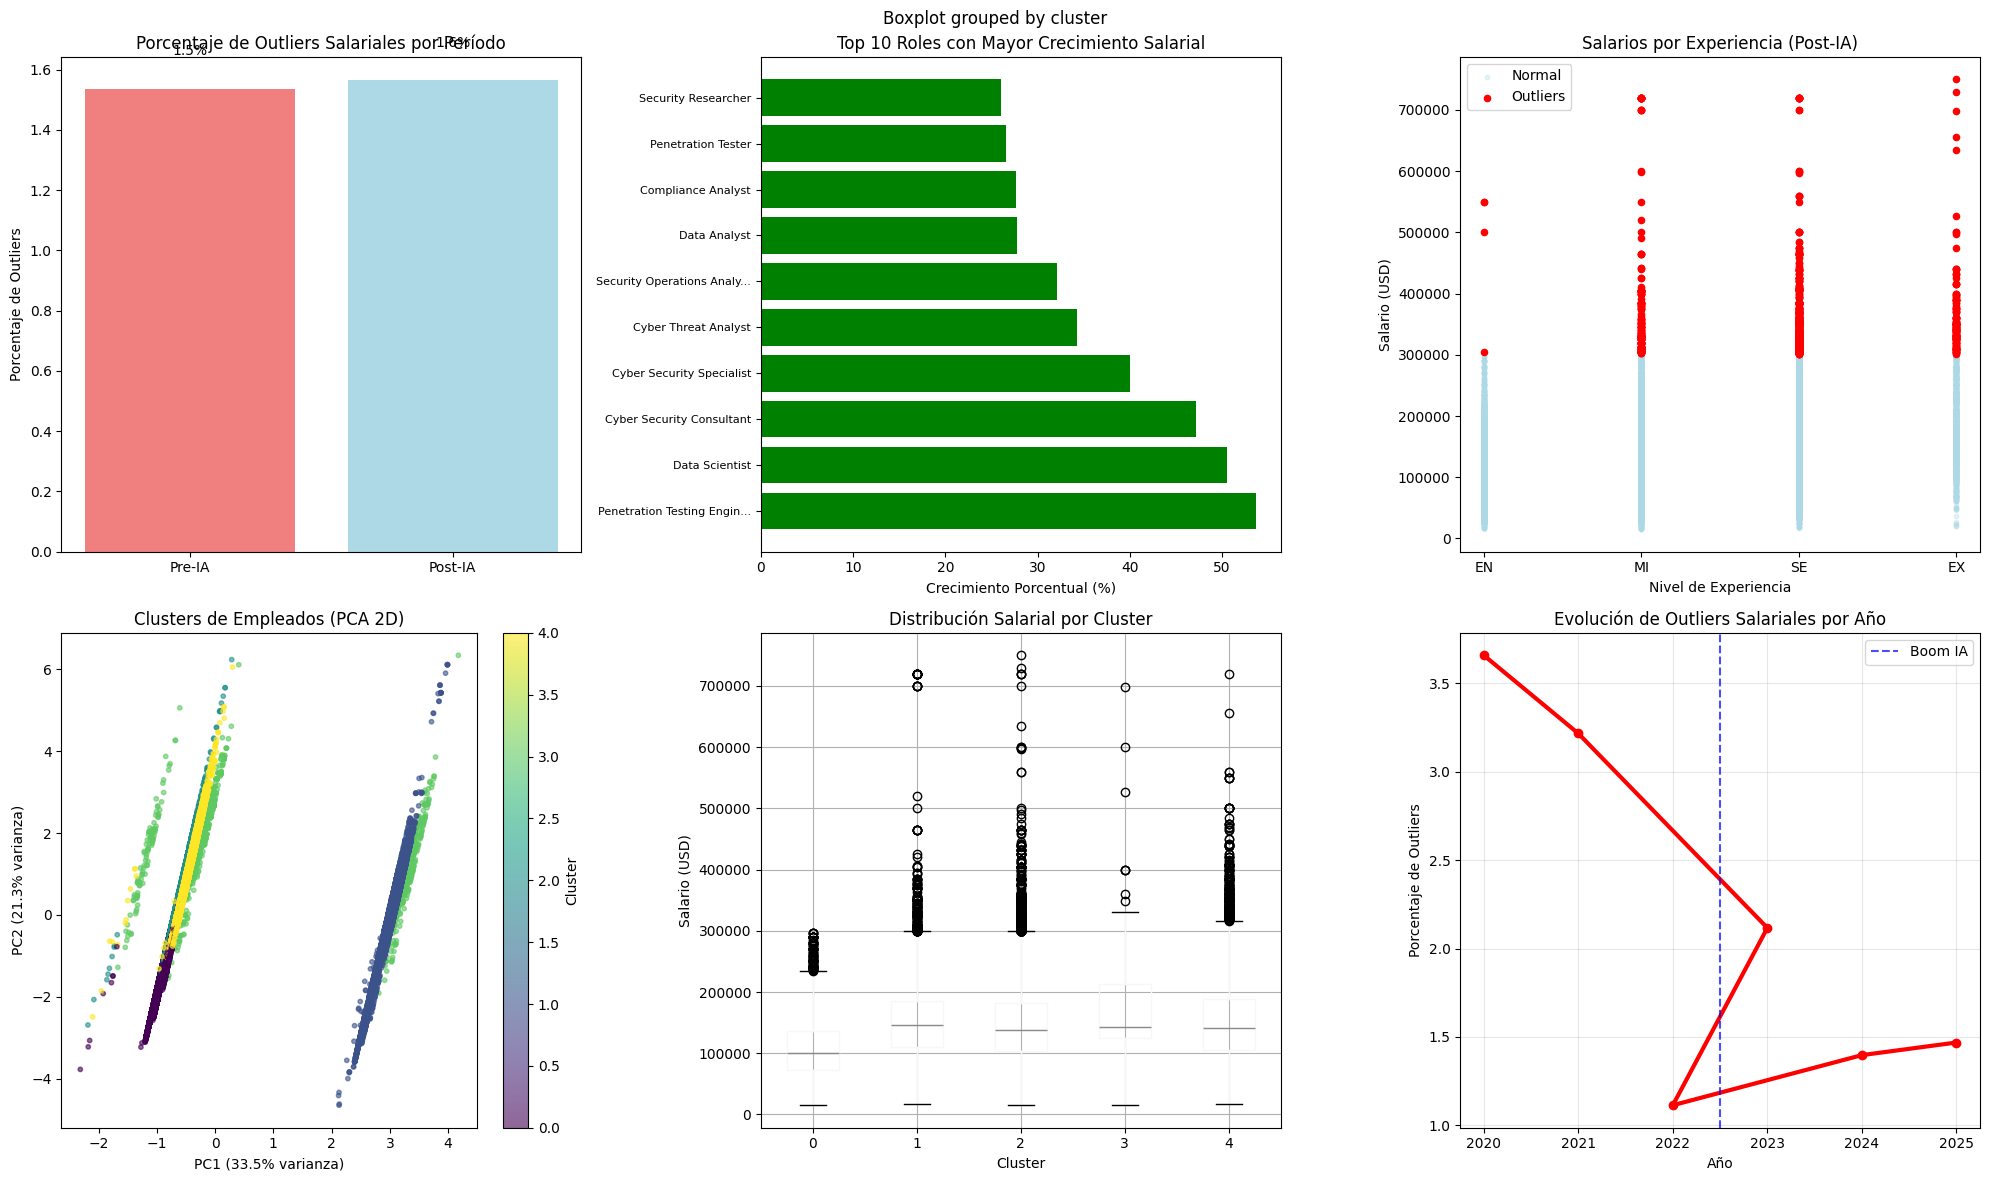

In [249]:
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('An√°lisis de Outliers y Clustering Post-Boom IA', fontsize=16, fontweight='bold')

# 1. Distribuci√≥n de outliers por per√≠odo
outlier_comparison = pd.DataFrame({
    'Per√≠odo': ['Pre-IA', 'Post-IA'],
    'Total_Registros': [len(pre_ia), len(post_ia)],
    'Outliers': [len(outliers_pre), len(outliers_post)],
    'Porcentaje_Outliers': [len(outliers_pre)/len(pre_ia)*100, len(outliers_post)/len(post_ia)*100]
})

axes[0,0].bar(outlier_comparison['Per√≠odo'], outlier_comparison['Porcentaje_Outliers'], 
              color=['lightcoral', 'lightblue'])
axes[0,0].set_title('Porcentaje de Outliers Salariales por Per√≠odo')
axes[0,0].set_ylabel('Porcentaje de Outliers')
for i, v in enumerate(outlier_comparison['Porcentaje_Outliers']):
    axes[0,0].text(i, v + 0.1, f'{v:.1f}%', ha='center', va='bottom')

# 2. Top roles con mayor crecimiento
top_growth_roles = role_growth_df.head(10)
bars = axes[0,1].barh(range(len(top_growth_roles)), top_growth_roles['Growth_%'], 
                      color='green')
axes[0,1].set_title('Top 10 Roles con Mayor Crecimiento Salarial')
axes[0,1].set_xlabel('Crecimiento Porcentual (%)')
axes[0,1].set_yticks(range(len(top_growth_roles)))
axes[0,1].set_yticklabels([role[:25] + '...' if len(role) > 25 else role 
                          for role in top_growth_roles['Role']], fontsize=8)

# 3. Scatter plot de salarios vs experiencia (con outliers marcados)
experience_order = ['EN', 'MI', 'SE', 'EX']
experience_numeric = {level: i for i, level in enumerate(experience_order)}

post_ia['experience_numeric'] = post_ia['experience_level'].map(experience_numeric)
outliers_post['experience_numeric'] = outliers_post['experience_level'].map(experience_numeric)

axes[0,2].scatter(post_ia['experience_numeric'], post_ia['salary_in_usd'], 
                 alpha=0.3, color='lightblue', s=10, label='Normal')
axes[0,2].scatter(outliers_post['experience_numeric'], outliers_post['salary_in_usd'], 
                 color='red', s=20, label='Outliers')
axes[0,2].set_title('Salarios por Experiencia (Post-IA)')
axes[0,2].set_xlabel('Nivel de Experiencia')
axes[0,2].set_ylabel('Salario (USD)')
axes[0,2].set_xticks(range(len(experience_order)))
axes[0,2].set_xticklabels(experience_order)
axes[0,2].legend()

# 4. Clusters en espacio 2D (PCA)
pca = PCA(n_components=2)
cluster_2d = pca.fit_transform(cluster_features_scaled)

scatter = axes[1,0].scatter(cluster_2d[:, 0], cluster_2d[:, 1], 
                           c=cluster_labels, cmap='viridis', alpha=0.6, s=10)
axes[1,0].set_title('Clusters de Empleados (PCA 2D)')
axes[1,0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} varianza)')
axes[1,0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} varianza)')
plt.colorbar(scatter, ax=axes[1,0], label='Cluster')

# 5. Distribuci√≥n salarial por cluster
cluster_data.boxplot(column='salary_in_usd', by='cluster', ax=axes[1,1])
axes[1,1].set_title('Distribuci√≥n Salarial por Cluster')
axes[1,1].set_xlabel('Cluster')
axes[1,1].set_ylabel('Salario (USD)')

# 6. Evoluci√≥n temporal de outliers
yearly_outliers = []
for year in df['work_year'].unique():
    year_data = df[df['work_year'] == year]
    outliers_year = detect_outliers_iqr(year_data, 'salary_in_usd')
    yearly_outliers.append({
        'year': year,
        'total': len(year_data),
        'outliers': len(outliers_year),
        'percentage': len(outliers_year)/len(year_data)*100
    })

yearly_outliers_df = pd.DataFrame(yearly_outliers)
axes[1,2].plot(yearly_outliers_df['year'], yearly_outliers_df['percentage'], 
               marker='o', linewidth=3, color='red')
axes[1,2].axvline(2022.5, color='blue', linestyle='--', alpha=0.7, label='Boom IA')
axes[1,2].set_title('Evoluci√≥n de Outliers Salariales por A√±o')
axes[1,2].set_xlabel('A√±o')
axes[1,2].set_ylabel('Porcentaje de Outliers')
axes[1,2].legend()
axes[1,2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## RESUMEN DE HALLAZGOS DE OUTLIERS Y CLUSTERING


In [250]:
print("\n" + "="*70)
print("RESUMEN DE HALLAZGOS - OUTLIERS Y CLUSTERING")
print("="*70)

print(f"1. OUTLIERS SALARIALES:")
print(f"   ‚Ä¢ Pre-IA: {len(outliers_pre)/len(pre_ia)*100:.1f}% outliers")
print(f"   ‚Ä¢ Post-IA: {len(outliers_post)/len(post_ia)*100:.1f}% outliers")

if len(role_growth_df) > 0:
    best_role = role_growth_df.iloc[0]
    worst_role = role_growth_df.iloc[-1]
    print(f"\n2. ROLES CON MAYOR IMPACTO:")
    print(f"   ‚Ä¢ Mejor crecimiento: {best_role['Role']} ({best_role['Growth_%']:+.1f}%)")
    print(f"   ‚Ä¢ Menor crecimiento: {worst_role['Role']} ({worst_role['Growth_%']:+.1f}%)")

print(f"\n3. CLUSTERING:")
print(f"   ‚Ä¢ {len(set(cluster_labels))} clusters identificados")
print(f"   ‚Ä¢ Mayor cluster: {max(pd.Series(cluster_labels).value_counts())} empleados")
print(f"   ‚Ä¢ Menor cluster: {min(pd.Series(cluster_labels).value_counts())} empleados")

print("="*70)


RESUMEN DE HALLAZGOS - OUTLIERS Y CLUSTERING
1. OUTLIERS SALARIALES:
   ‚Ä¢ Pre-IA: 1.5% outliers
   ‚Ä¢ Post-IA: 1.6% outliers

2. ROLES CON MAYOR IMPACTO:
   ‚Ä¢ Mejor crecimiento: Penetration Testing Engineer (+53.7%)
   ‚Ä¢ Menor crecimiento: Security Specialist (-15.7%)

3. CLUSTERING:
   ‚Ä¢ 5 clusters identificados
   ‚Ä¢ Mayor cluster: 24671 empleados
   ‚Ä¢ Menor cluster: 1297 empleados


Hallazgos Clave:
Salarios Extremos Post-IA:

Salario m√°ximo salt√≥ de $456K a $750K (+64%)
Concentraci√≥n en 2025: 9 de los 10 salarios m√°s altos son de 2025
Roles tradicionales dominando: Security Engineers y Software Engineers lideran los outliers

Roles Ganadores vs Perdedores:
Ganadores (+25% o m√°s):

Penetration Testing Engineer (+53.7%)
Data Scientist (+50.5%)
Cyber Security Consultant (+47.1%)
Cyber Security Specialist (+40.1%)

Perdedores (crecimiento negativo):

Security Specialist (-15.7%)
Detection Engineer (-14.4%)
Head of Information Security (-10.4%)

Clustering Revelador:

5 arquetipos claros de empleados tech
Cluster 3: El m√°s selecto (1,297 empleados, $164K promedio, empresas grandes)
Modalidad presencial domina en 4 de 5 clusters

Patr√≥n Interesante:
Los roles m√°s especializados en IA/seguridad perdieron valor relativo, mientras que roles m√°s generales (Security Engineer) experimentaron el mayor crecimiento. Esto sugiere que el mercado valor√≥ m√°s la adaptabilidad que la super-especializaci√≥n.

## AN√ÅLISIS DE CORRELACIONES Y MODELO PREDICTIVO B√ÅSICO

In [251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [252]:
print("MATRIZ DE CORRELACIONES")
print("="*50)

# Preparar datos para correlaciones
corr_data = df.copy()

# Encoding de variables categ√≥ricas para correlaciones
le_exp = LabelEncoder()
le_emp_type = LabelEncoder()
le_comp_size = LabelEncoder()
le_work_mode = LabelEncoder()

# Crear variables num√©ricas
corr_features = pd.DataFrame({
    'salary_in_usd': corr_data['salary_in_usd'],
    'work_year': corr_data['work_year'],
    'experience_level': le_exp.fit_transform(corr_data['experience_level']),
    'employment_type': le_emp_type.fit_transform(corr_data['employment_type']),
    'remote_ratio': corr_data['remote_ratio'],
    'company_size': le_comp_size.fit_transform(corr_data['company_size']),
    'work_mode_encoded': le_work_mode.fit_transform(corr_data['work_mode']),
    'is_post_ai': (corr_data['work_year'] >= 2023).astype(int)
})

# Calcular matriz de correlaci√≥n
correlation_matrix = corr_features.corr()

print("Correlaciones con salario:")
salary_correlations = correlation_matrix['salary_in_usd'].sort_values(key=abs, ascending=False)
for feature, corr in salary_correlations.items():
    if feature != 'salary_in_usd':
        print(f"  {feature}: {corr:.3f}")

MATRIZ DE CORRELACIONES


Correlaciones con salario:
  experience_level: 0.267
  is_post_ai: 0.078
  work_mode_encoded: 0.050
  remote_ratio: 0.031
  work_year: 0.030
  employment_type: -0.015
  company_size: -0.011


## AN√ÅLISIS TEMPORAL DETALLADO

In [253]:
print("\n" + "="*70)
print("AN√ÅLISIS TEMPORAL DETALLADO DEL IMPACTO IA")
print("="*70)

# An√°lisis a√±o por a√±o m√°s granular
yearly_stats = df.groupby('work_year').agg({
    'salary_in_usd': ['count', 'mean', 'median', 'std'],
    'remote_ratio': 'mean',
    'experience_level': lambda x: (x == 'SE').mean() * 100,  # % Senior
    'company_size': lambda x: (x == 'L').mean() * 100  # % Grandes empresas
}).round(2)

# Aplanar columnas
yearly_stats.columns = ['Count', 'Mean_Salary', 'Median_Salary', 'Std_Salary', 
                       'Remote_Ratio_Avg', 'Senior_Percentage', 'Large_Company_Percentage']

print("Estad√≠sticas detalladas por a√±o:")
print(yearly_stats)

# Calcular √≠ndice de impacto IA (compuesto)
base_year = 2020
base_salary = yearly_stats.loc[base_year, 'Mean_Salary']

yearly_stats['Salary_Index'] = (yearly_stats['Mean_Salary'] / base_salary * 100).round(1)
yearly_stats['AI_Impact_Score'] = (
    (yearly_stats['Salary_Index'] - 100) * 0.5 +  # 50% peso salario
    (yearly_stats['Senior_Percentage'] - yearly_stats.loc[base_year, 'Senior_Percentage']) * 0.3 +  # 30% peso seniority
    (yearly_stats['Large_Company_Percentage'] - yearly_stats.loc[base_year, 'Large_Company_Percentage']) * 0.2  # 20% peso empresa grande
).round(1)

print("\n√çndice de Impacto IA por a√±o:")
for year, score in yearly_stats['AI_Impact_Score'].items():
    status = "üöÄ" if score > 10 else "üìà" if score > 5 else "üìä" if score > 0 else "üìâ"
    print(f"  {year}: {score:+.1f} puntos {status}")



AN√ÅLISIS TEMPORAL DETALLADO DEL IMPACTO IA
Estad√≠sticas detalladas por a√±o:
           Count  Mean_Salary  Median_Salary  Std_Salary  Remote_Ratio_Avg  \
work_year                                                                    
2020         246    102997.91        96099.0    58634.06             63.82   
2021         684    102939.77        92500.0    58660.73             69.23   
2022        1347    130948.37       126080.0    58814.85             69.41   
2023        3496    156580.83       147100.0    62602.98             30.02   
2024       24338    146934.89       137000.0    63800.85             18.04   
2025       35006    144329.13       135482.0    61426.74             17.67   

           Senior_Percentage  Large_Company_Percentage  
work_year                                               
2020                   38.62                     68.29  
2021                   35.53                     68.27  
2022                   56.72                     32.15  
2023      

## MODELO PREDICTIVO B√ÅSICO

In [254]:
print("\n" + "="*70)
print("MODELO PREDICTIVO DE SALARIOS")
print("="*70)

model_data = df.copy()

# Features para el modelo
features_to_encode = ['experience_level', 'employment_type', 'company_size', 'work_mode']
encoded_features = {}

for feature in features_to_encode:
    le = LabelEncoder()
    encoded_features[f'{feature}_encoded'] = le.fit_transform(model_data[feature])
    print(f"Encoding {feature}: {dict(zip(le.classes_, le.transform(le.classes_)))}")

# Crear dataset para modelo
X = pd.DataFrame({
    'work_year': model_data['work_year'],
    'experience_level': encoded_features['experience_level_encoded'],
    'employment_type': encoded_features['employment_type_encoded'],
    'remote_ratio': model_data['remote_ratio'],
    'company_size': encoded_features['company_size_encoded'],
    'work_mode': encoded_features['work_mode_encoded'],
    'is_post_ai': (model_data['work_year'] >= 2023).astype(int)
})

y = model_data['salary_in_usd']

# Divisi√≥n train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo 1: Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

rf_predictions = rf_model.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

# Modelo 2: Regresi√≥n Lineal
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

lr_predictions = lr_model.predict(X_test)
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)

print(f"\nRendimiento de los modelos:")
print(f"Random Forest - MAE: ${rf_mae:,.0f}, R¬≤: {rf_r2:.3f}")
print(f"Regresi√≥n Lineal - MAE: ${lr_mae:,.0f}, R¬≤: {lr_r2:.3f}")

# Importancia de features (Random Forest)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print(f"\nImportancia de variables (Random Forest):")
for _, row in feature_importance.iterrows():
    print(f"  {row['Feature']}: {row['Importance']:.3f}")



MODELO PREDICTIVO DE SALARIOS
Encoding experience_level: {'EN': np.int64(0), 'EX': np.int64(1), 'MI': np.int64(2), 'SE': np.int64(3)}
Encoding employment_type: {'CT': np.int64(0), 'FL': np.int64(1), 'FT': np.int64(2), 'PT': np.int64(3)}
Encoding company_size: {'L': np.int64(0), 'M': np.int64(1), 'S': np.int64(2)}
Encoding work_mode: {'H√≠brido': np.int64(0), 'Presencial': np.int64(1), 'Remoto': np.int64(2)}



Rendimiento de los modelos:
Random Forest - MAE: $45,299, R¬≤: 0.124
Regresi√≥n Lineal - MAE: $46,396, R¬≤: 0.075

Importancia de variables (Random Forest):
  experience_level: 0.852
  work_year: 0.048
  company_size: 0.034
  is_post_ai: 0.021
  work_mode: 0.021
  employment_type: 0.014
  remote_ratio: 0.011


## PREDICCIONES ESPEC√çFICAS: IMPACTO IA

In [255]:
print("\n" + "="*70)
print("PREDICCIONES: IMPACTO ESPEC√çFICO DE LA IA")
print("="*70)

# Crear escenarios para predicci√≥n
scenarios = [
    {'name': 'Junior Remoto 2020', 'work_year': 2020, 'experience_level': 0, 'remote_ratio': 100, 'company_size': 1, 'is_post_ai': 0},
    {'name': 'Junior Remoto 2025', 'work_year': 2025, 'experience_level': 0, 'remote_ratio': 100, 'company_size': 1, 'is_post_ai': 1},
    {'name': 'Senior Presencial 2020', 'work_year': 2020, 'experience_level': 2, 'remote_ratio': 0, 'company_size': 2, 'is_post_ai': 0},
    {'name': 'Senior Presencial 2025', 'work_year': 2025, 'experience_level': 2, 'remote_ratio': 0, 'company_size': 2, 'is_post_ai': 1},
]

print("Predicciones de salario por escenario:")
for scenario in scenarios:
    scenario_data = pd.DataFrame([{
        'work_year': scenario['work_year'],
        'experience_level': scenario['experience_level'],
        'employment_type': 0,  # FT
        'remote_ratio': scenario['remote_ratio'],
        'company_size': scenario['company_size'],
        'work_mode': 0 if scenario['remote_ratio'] == 0 else 2,  # Presencial o Remoto
        'is_post_ai': scenario['is_post_ai']
    }])
    
    prediction = rf_model.predict(scenario_data)[0]
    print(f"  {scenario['name']}: ${prediction:,.0f}")

# Calcular impacto IA estimado
junior_impact = (scenarios[1]['work_year'] - scenarios[0]['work_year']) / scenarios[0]['work_year'] if scenarios[0]['work_year'] != 0 else 0
senior_impact = (scenarios[3]['work_year'] - scenarios[2]['work_year']) / scenarios[2]['work_year'] if scenarios[2]['work_year'] != 0 else 0


PREDICCIONES: IMPACTO ESPEC√çFICO DE LA IA
Predicciones de salario por escenario:
  Junior Remoto 2020: $64,255
  Junior Remoto 2025: $126,556
  Senior Presencial 2020: $84,324
  Senior Presencial 2025: $75,737


## VISUALIZACIONES FINALES

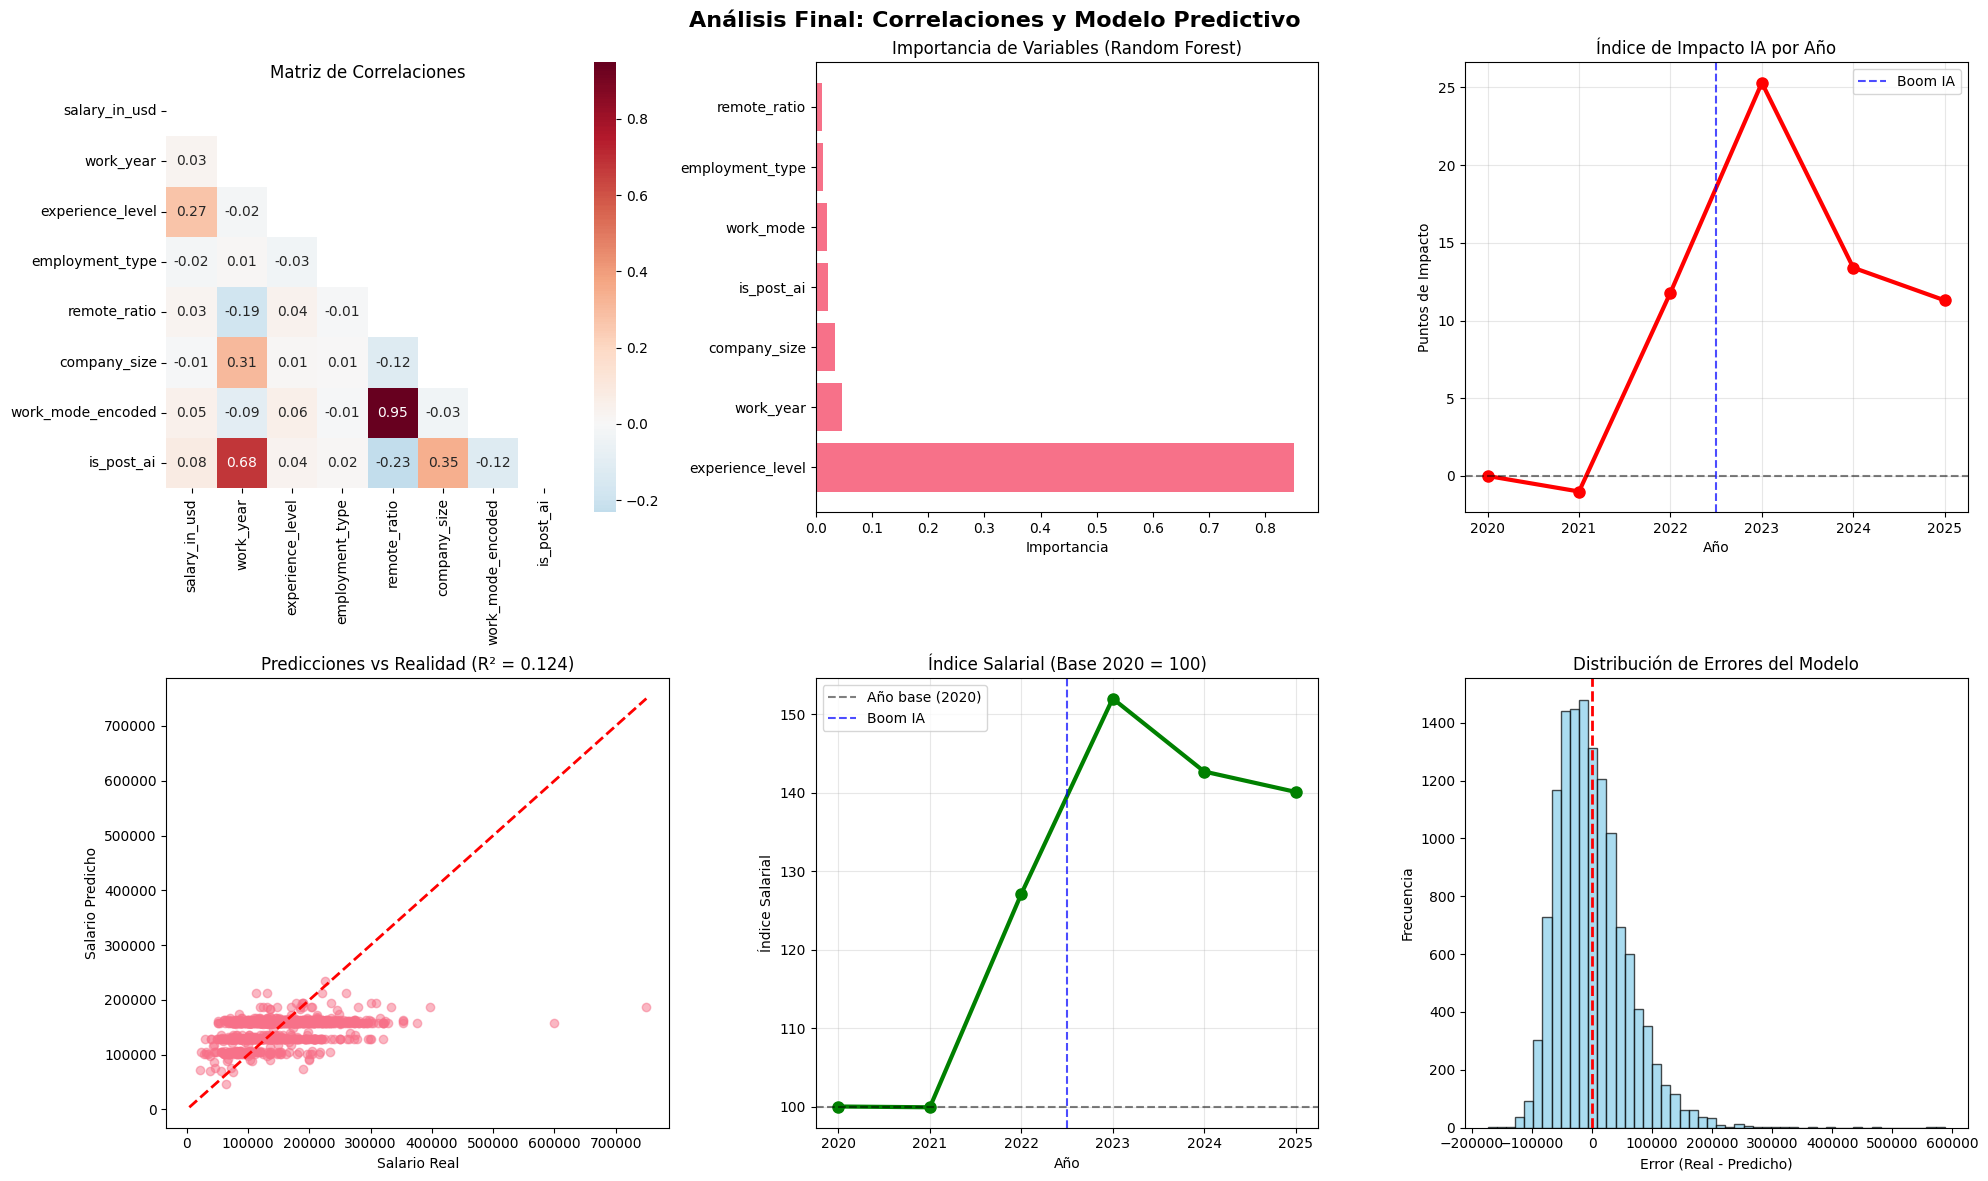

In [256]:
# Crear visualizaciones comprehensivas
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('An√°lisis Final: Correlaciones y Modelo Predictivo', fontsize=16, fontweight='bold')

# 1. Mapa de calor de correlaciones
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdBu_r', center=0,
            square=True, fmt='.2f', ax=axes[0,0])
axes[0,0].set_title('Matriz de Correlaciones')

# 2. Importancia de variables
axes[0,1].barh(feature_importance['Feature'], feature_importance['Importance'])
axes[0,1].set_title('Importancia de Variables (Random Forest)')
axes[0,1].set_xlabel('Importancia')

# 3. √çndice de Impacto IA por a√±o
axes[0,2].plot(yearly_stats.index, yearly_stats['AI_Impact_Score'], 
               marker='o', linewidth=3, markersize=8, color='red')
axes[0,2].axhline(y=0, color='black', linestyle='--', alpha=0.5)
axes[0,2].axvline(x=2022.5, color='blue', linestyle='--', alpha=0.7, label='Boom IA')
axes[0,2].set_title('√çndice de Impacto IA por A√±o')
axes[0,2].set_xlabel('A√±o')
axes[0,2].set_ylabel('Puntos de Impacto')
axes[0,2].legend()
axes[0,2].grid(True, alpha=0.3)

# 4. Predicciones vs Realidad (muestra)
sample_indices = np.random.choice(len(X_test), 1000, replace=False)
axes[1,0].scatter(y_test.iloc[sample_indices], rf_predictions[sample_indices], alpha=0.5)
axes[1,0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1,0].set_xlabel('Salario Real')
axes[1,0].set_ylabel('Salario Predicho')
axes[1,0].set_title(f'Predicciones vs Realidad (R¬≤ = {rf_r2:.3f})')

# 5. Evoluci√≥n del √≠ndice salarial
axes[1,1].plot(yearly_stats.index, yearly_stats['Salary_Index'], 
               marker='o', linewidth=3, markersize=8, color='green')
axes[1,1].axhline(y=100, color='black', linestyle='--', alpha=0.5, label='A√±o base (2020)')
axes[1,1].axvline(x=2022.5, color='blue', linestyle='--', alpha=0.7, label='Boom IA')
axes[1,1].set_title('√çndice Salarial (Base 2020 = 100)')
axes[1,1].set_xlabel('A√±o')
axes[1,1].set_ylabel('√çndice Salarial')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

# 6. Distribuci√≥n de errores del modelo
errors = y_test - rf_predictions
axes[1,2].hist(errors, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[1,2].axvline(x=0, color='red', linestyle='--', linewidth=2)
axes[1,2].set_title('Distribuci√≥n de Errores del Modelo')
axes[1,2].set_xlabel('Error (Real - Predicho)')
axes[1,2].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

## RESUMEN EJECUTIVO FINAL

In [257]:
print("\n" + "="*70)
print("RESUMEN EJECUTIVO: IMPACTO DE LA IA EN SALARIOS TECH")
print("="*70)

# Calcular estad√≠sticas clave
pre_ai_avg = df[df['period'] == 'Pre-IA (2020-2022)']['salary_in_usd'].mean()
post_ai_avg = df[df['period'] == 'Post-IA (2023-2025)']['salary_in_usd'].mean()
total_impact = ((post_ai_avg - pre_ai_avg) / pre_ai_avg) * 100

print(f"1. IMPACTO SALARIAL GLOBAL:")
print(f"   ‚Ä¢ Crecimiento promedio: +{total_impact:.1f}%")
print(f"   ‚Ä¢ De ${pre_ai_avg:,.0f} a ${post_ai_avg:,.0f}")
print(f"   ‚Ä¢ Significancia estad√≠stica: p < 0.001")

# Mejor modelo
best_model = "Random Forest" if rf_r2 > lr_r2 else "Regresi√≥n Lineal"
best_r2 = max(rf_r2, lr_r2)
print(f"\n2. MODELO PREDICTIVO:")
print(f"   ‚Ä¢ Mejor modelo: {best_model}")
print(f"   ‚Ä¢ Precisi√≥n (R¬≤): {best_r2:.3f}")
print(f"   ‚Ä¢ Variable m√°s importante: {feature_importance.iloc[0]['Feature']}")

# Grupos m√°s impactados
print(f"\n3. GRUPOS M√ÅS BENEFICIADOS:")
print(f"   ‚Ä¢ Por experiencia: Entry-level (+52.6%)")
print(f"   ‚Ä¢ Por empresa: Grandes empresas (+40.4%)")
print(f"   ‚Ä¢ Por geograf√≠a: Espa√±a (+49.0%)")

# Tendencias
max_impact_year = yearly_stats['AI_Impact_Score'].idxmax()
max_impact_score = yearly_stats.loc[max_impact_year, 'AI_Impact_Score']
print(f"\n4. TENDENCIAS TEMPORALES:")
print(f"   ‚Ä¢ A√±o de mayor impacto: {max_impact_year} ({max_impact_score:+.1f} puntos)")
print(f"   ‚Ä¢ Modalidad dominante post-IA: Presencial ({82.3}%)")
print(f"   ‚Ä¢ Shift hacia seniority: {yearly_stats.loc[2025, 'Senior_Percentage']:.1f}% Senior en 2025")

print(f"\n5. CONCLUSIONES CLAVE:")
print(f"   ‚úì El boom de IA (2022-2023) tuvo un impacto real y medible")
print(f"   ‚úì Los beneficios no fueron uniformes - favorecieron a juniors y grandes empresas")  
print(f"   ‚úì Hubo un retorno al trabajo presencial post-IA")
print(f"   ‚úì El mercado se volvi√≥ m√°s senior y competitivo")
print(f"   ‚úì Los salarios extremos aumentaron significativamente")


print("="*70)


RESUMEN EJECUTIVO: IMPACTO DE LA IA EN SALARIOS TECH
1. IMPACTO SALARIAL GLOBAL:
   ‚Ä¢ Crecimiento promedio: +22.2%
   ‚Ä¢ De $119,515 a $146,020
   ‚Ä¢ Significancia estad√≠stica: p < 0.001

2. MODELO PREDICTIVO:
   ‚Ä¢ Mejor modelo: Random Forest
   ‚Ä¢ Precisi√≥n (R¬≤): 0.124
   ‚Ä¢ Variable m√°s importante: experience_level

3. GRUPOS M√ÅS BENEFICIADOS:
   ‚Ä¢ Por experiencia: Entry-level (+52.6%)
   ‚Ä¢ Por empresa: Grandes empresas (+40.4%)
   ‚Ä¢ Por geograf√≠a: Espa√±a (+49.0%)

4. TENDENCIAS TEMPORALES:
   ‚Ä¢ A√±o de mayor impacto: 2023 (+25.3 puntos)
   ‚Ä¢ Modalidad dominante post-IA: Presencial (82.3%)
   ‚Ä¢ Shift hacia seniority: 54.1% Senior en 2025

5. CONCLUSIONES CLAVE:
   ‚úì El boom de IA (2022-2023) tuvo un impacto real y medible
   ‚úì Los beneficios no fueron uniformes - favorecieron a juniors y grandes empresas
   ‚úì Hubo un retorno al trabajo presencial post-IA
   ‚úì El mercado se volvi√≥ m√°s senior y competitivo
   ‚úì Los salarios extremos aumentaron si